In [1]:
from typing import Callable, Sequence, Tuple
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NonConvergenceError(Exception): pass

In [5]:
class LinearRegression:

    def __init__(self, data: Sequence[Tuple[float, float]]):
        self.data = data
        self.m = len(data)
    
    def get_hypothesis(self, t0: float, t1: float) -> Callable[[float], float]:
        def h(x: float) -> float:
            return t0 + (t1 * x)
        return h

    def cost_function(self, h: Callable[[float], float]) -> float:
        cost = 0.0
        for x, y in self.data:
            cost += (h(x) - y)**2
        cost /= (2 * self.m)
        return cost
    
    def gradient_descent(self, a: float, t0_start: float = 0, t1_start: float = 0) -> Tuple[float, float, Callable[[float], float]]:
        t0 = t0_start
        t1 = t1_start
        TINY = 1e-4
        step = np.inf
        num_steps = 0
        while step > TINY:
            num_steps += 1
            h = self.get_hypothesis(t0, t1)
            t0_deriv = sum([h(x) - y for x, y in self.data]) / self.m
            t1_deriv = sum([(h(x) - y) * x for x, y in self.data]) / self.m
            step0 = a * t0_deriv
            step1 = a * t1_deriv
            t0 -= step0
            t1 -= step1
            new_step = math.sqrt((step0 ** 2) + (step1 ** 2))
            if new_step > step:
                raise NonConvergenceError(f'Failed to converge: latest step ({new_step}) is greater than previous step ({step}).')
            elif new_step < TINY:
                return t0, t1, h, num_steps
            step = new_step
            


In [6]:
data = [(1, 3), (2, 7.1), (3, 7.8), (4, 14.1), (5, 18.3)]
test = LinearRegression(data)
t0, t1, h, num_steps = test.gradient_descent(a=0.01)
print(t0, t1)

-1.1631168596637835 3.744244282250957


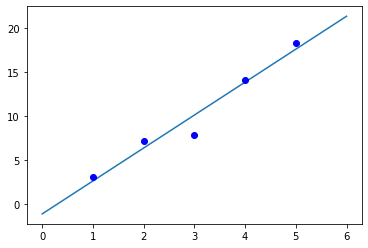

In [7]:
plt.plot([0, 6], [h(0), h(6)])
for x, y in data:
    plt.plot(x, y, 'bo')

In [ ]:
num_steps

In [8]:
test.cost_function(h)

0.6558954743889626

In [ ]:
test.cost_function(test.get_hypothesis(t0-0.1, t1-0.1))

In [ ]:
data2 = [(3, 2), (1, 2), (0, 1), (4, 3)]
test2 = LinearRegression(data2)
test2.cost_function(test2.get_hypothesis(0, 1))
t0, t1, h, num_steps = test2.gradient_descent(a=0.01)

In [ ]:
plt.plot([-1, 6], [h(-1), h(5)])
for x, y in data2:
    plt.plot(x, y, 'bo')